<a href="https://colab.research.google.com/github/forestser/Pyhton/blob/main/03_pandas_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

# **해결문제**


부산지역 2019~2020년 RFID기반 음식물쓰레기 배출량를 분석하시오. 


---

In [3]:
#한글 폰트 사용설치
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import datetime as dt
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

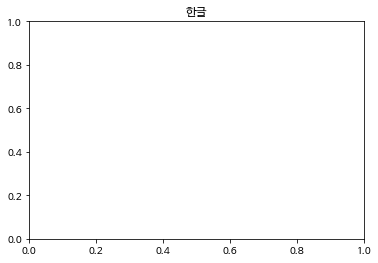

In [2]:
plt.title('한글')
plt.show()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터불러오기



In [4]:
#pandas 라이브러리 추가
import pandas as pd

In [26]:
#데이터불러오기
df = pd.read_csv('/content/drive/MyDrive/BSSM2022/BSSM2022/data/부산RFID음식물쓰레기.csv')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11696 entries, 0 to 11695
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일자      11696 non-null  object 
 1   요일      11696 non-null  int64  
 2   배출량     11696 non-null  int64  
 3   배출량비율   11696 non-null  float64
 4   배출횟수    11696 non-null  int64  
 5   배출횟수비율  11696 non-null  float64
 6   영역코드    11696 non-null  object 
 7   시도명     11696 non-null  object 
 8   시군구명    11696 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 822.5+ KB


In [21]:
df['년도'] = pd.to_datetime(df['일자']).dt.year 
df[(df['시군구명'] == '강서구') & (df['년도'] == 2020)]

,일자,요일,배출량,배출량비율,배출횟수,배출횟수비율,영역코드,시도명,시군구명,년도
8406,2020-01-01,4,13704300,3.55,7486,3.42,W11,부산광역시,강서구,2020
8407,2020-01-02,5,12576650,3.25,7080,3.24,W11,부산광역시,강서구,2020
8408,2020-01-03,6,11132750,2.88,6410,2.93,W11,부산광역시,강서구,2020
8409,2020-01-04,7,11412150,2.95,6522,2.98,W11,부산광역시,강서구,2020
8410,2020-01-05,1,14395050,3.73,8031,3.67,W11,부산광역시,강서구,2020
...,...,...,...,...,...,...,...,...,...,...
8767,2020-12-27,1,16429400,3.58,9133,3.50,W11,부산광역시,강서구,2020
8768,2020-12-28,2,16190200,3.53,9184,3.52,W11,부산광역시,강서구,2020
8769,2020-12-29,3,12343050,2.69,7444,2.85,W11,부산광역시,강서구,2020
8770,2020-12-30,4,12162850,2.65,7293,2.80,W11,부산광역시,강서구,2020


## **열 타입 변경**


---
+ df.dtypes : 데이터타입 확인
+ df[열명].astype(변환타입)
  + 정수형은 .astype(‘int’)
  + 문자형은 .astype(‘str’)
  + 범주형은 .astype(‘category’)
+ pd.to_numeric(열): 문자열 칼럼의 숫자형 변환 
+ pd.to_datetime(열) : 날짜형식으로 변경



### 시계열 자료
* **dt 접근자** : datetime 자료형 시리즈에는 dt 접근자가 있어 datetime 자료형이 가진 몇가지 유용한 속성과 메서드를 사용
  +  year, month, day, weekday 등의 속성을 이용하면 년, 월, 일, 요일 정보 추출

dt 접근자 | 내용 
-------------------|------------------
.dt.date         | YYYY-MM-DD(문자)
.dt.year         | 연(4자리숫자)
.dt.month        | 월(숫자)
.dt.month_name() | 월(문자)
.dt.day          | 일(숫자)
.dt.time         | HH:MM:SS(문자)
.dt.hour         | 시(숫자)
.dt.minute       | 분(숫자)
.dt.second       | 초(숫자)
.dt.quarter       | 분기(숫자)
.dt.day_name()  | 요일이름(문자)  
.dt.weekday       | 요일숫자(0-월, 1-화) (=dayofweek)
.dt.weekofyear    | 연 기준 몇주째(숫자) (=week)
.dt.dayofyear     | 연 기준 몇일째(숫자)
.dt.days_in_month | 월 일수(숫자) (=daysinmonth)

In [28]:
#일자를 날짜 형식으로 변환 
df['일자'] = pd.to_datetime(df['일자'])

In [29]:
#변환 확인 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11696 entries, 0 to 11695
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      11696 non-null  datetime64[ns]
 1   요일      11696 non-null  int64         
 2   배출량     11696 non-null  int64         
 3   배출량비율   11696 non-null  float64       
 4   배출횟수    11696 non-null  int64         
 5   배출횟수비율  11696 non-null  float64       
 6   영역코드    11696 non-null  object        
 7   시도명     11696 non-null  object        
 8   시군구명    11696 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 822.5+ KB


In [30]:
#연도/월 추출하여 연도/월 열 추가 
df['연도'] = df['일자'].dt.year
df['월'] =  df['일자'].dt.month

In [31]:
#추가 확인 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11696 entries, 0 to 11695
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      11696 non-null  datetime64[ns]
 1   요일      11696 non-null  int64         
 2   배출량     11696 non-null  int64         
 3   배출량비율   11696 non-null  float64       
 4   배출횟수    11696 non-null  int64         
 5   배출횟수비율  11696 non-null  float64       
 6   영역코드    11696 non-null  object        
 7   시도명     11696 non-null  object        
 8   시군구명    11696 non-null  object        
 9   연도      11696 non-null  int64         
 10  월       11696 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 1005.2+ KB


In [33]:
# 연도와 월을 범주형 데이터타입으로 변경
df['연도'] = df['연도'].astype('category')
df['월'] = df['월'].astype('category') 

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11696 entries, 0 to 11695
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      11696 non-null  datetime64[ns]
 1   요일      11696 non-null  int64         
 2   배출량     11696 non-null  int64         
 3   배출량비율   11696 non-null  float64       
 4   배출횟수    11696 non-null  int64         
 5   배출횟수비율  11696 non-null  float64       
 6   영역코드    11696 non-null  object        
 7   시도명     11696 non-null  object        
 8   시군구명    11696 non-null  object        
 9   연도      11696 non-null  category      
 10  월       11696 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 845.8+ KB


## 연도별 배출량

In [35]:
import seaborn as sns

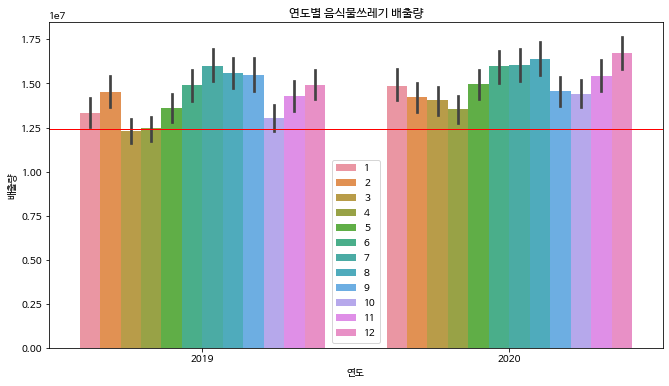

In [47]:
plt.figure(figsize=(11,6))
plt.title('연도별 음식물쓰레기 배출량')
sns.barplot(x='연도',y='배출량',hue='월',data = df)
plt.axhline(y=1.24e7, color='r', linewidth=1)
plt.legend()
plt.show()

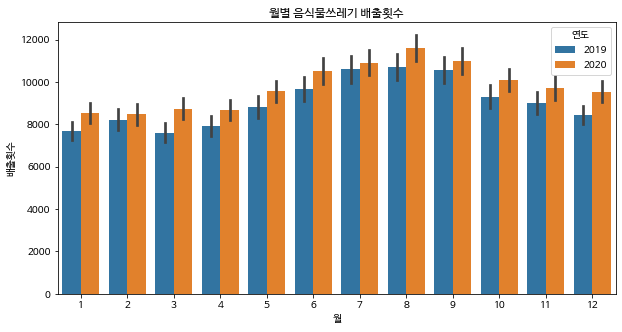

In [48]:
plt.figure(figsize=(10,5))
plt.title('월별 음식물쓰레기 배출횟수')
sns.barplot(x='월',y='배출횟수',hue='연도',data = df)
plt.show()

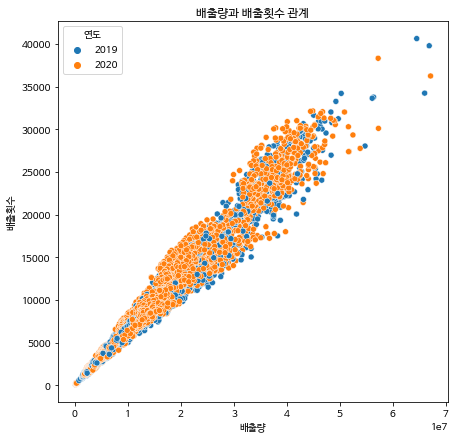

In [49]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='배출량', y='배출횟수', hue='연도', data=df)
plt.title('배출량과 배출횟수 관계') 
plt.show()

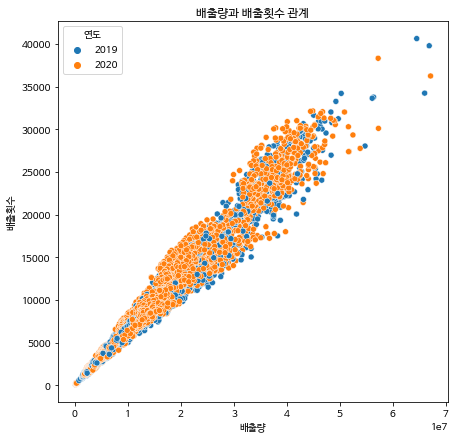

In [ ]:
plt.figure(figsize=(7,7))
 

plt.title('배출량과 배출횟수 관계') 
plt.show()

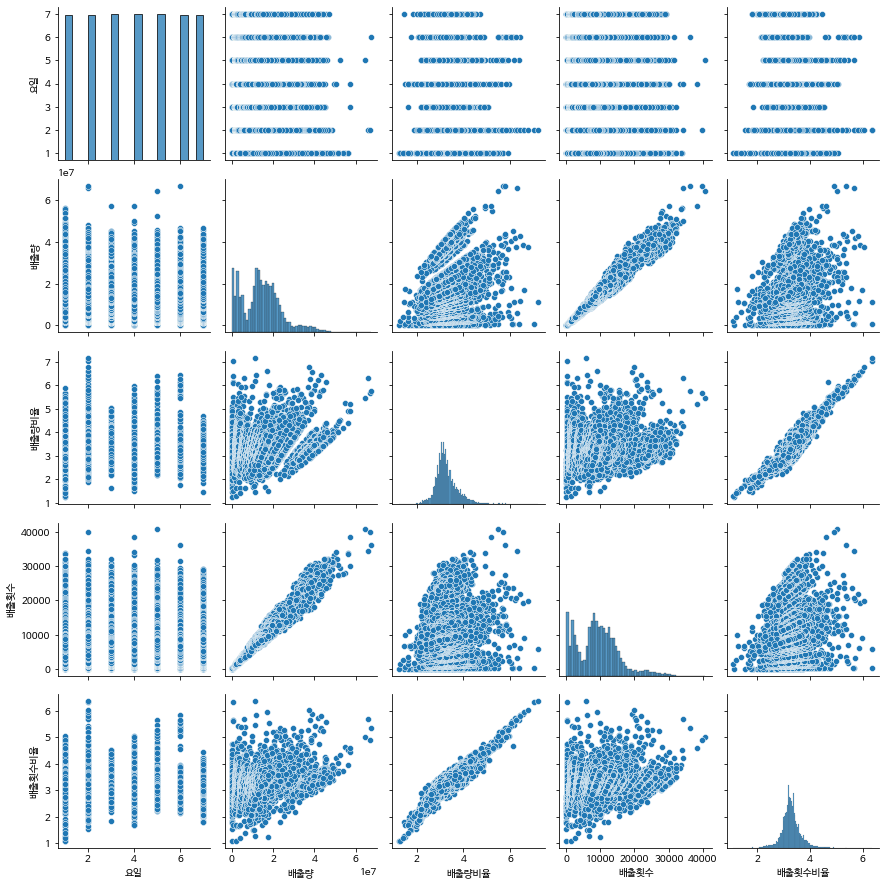

In [50]:
sns.pairplot(df)
plt.show()

## **각 열의 범주형 자료 분석**

+ **df.drop_duplicates()** : 중복값은 모두 제거하고 유일한 값만 표시
+ **df.unique()**: 각 열 내에 유일한 값을 확인
+ **df.value_counts()** : 각 열 내에 각각의 값이 나온 횟수 
+ 시리즈.map(딕션너리) : 해당 시리즈의 내용에 매핑할 값을 딕셔너리 형태로 지정

In [51]:
#요일자료 분석 (1-7 :일-토)
df['요일'].unique()

array([3, 4, 5, 6, 7, 1, 2])

In [52]:
df['요일명'] = df['요일'].map({1:'일',2:'월',3:'화',4:'수',5:'목',6:'금',7:'토',})

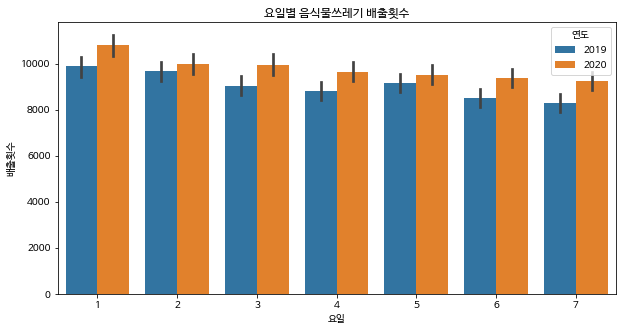

In [75]:
plt.figure(figsize=(10,5))
plt.xticks(range(7), labels=['일','월','화','수','목','금','토'])
sns.barplot(x='요일', y='배출횟수', hue='연도', data=df)
plt.title('요일별 음식물쓰레기 배출횟수')
plt.show()

## 그룹화
* 데이터를 그룹별로 분류
* df.groupby(인수)
  + 열 또는 열의 리스트
  + 행 인덱스
* 그룹 연산 메소드
  + size, count: 그룹 데이터의 갯수
  + mean, median, min, max: 그룹 데이터의 평균, 중앙값, 최소, 최대
  + sum, prod, std, var, quantile : 그룹 데이터의 합계, 곱, 표준편차, 분산, 사분위수
  + first, last: 그룹 데이터 중 가장 첫번째 데이터와 가장 나중 데이터

In [64]:
#연도별 요일별 배출량 배출횟수 평균 
df.groupby(['연도','요일']).count()['일자']

연도    요일
2019  1     832
      2     832
      3     848
      4     832
      5     832
      6     832
      7     832
2020  1     832
      2     832
      3     832
      4     848
      5     848
      6     832
      7     832
Name: 일자, dtype: int64

In [140]:
dfg = df.groupby(['연도','요일']).mean(['배출량','배출횟수'])[['배출량','배출횟수']]
dfg

배출량          배출횟수
연도   요일                            
2019 1   1.674633e+07   9878.115385
     2   1.548629e+07   9674.259615
     3   1.392737e+07   9044.162736
     4   1.328349e+07   8789.230769
     5   1.391685e+07   9151.894231
     6   1.281379e+07   8509.591346
     7   1.321908e+07   8288.973558
2020 1   1.797600e+07  10787.542067
     2   1.556427e+07   9974.257212
     3   1.500809e+07   9937.784856
     4   1.435953e+07   9643.946934
     5   1.427862e+07   9523.709906
     6   1.403825e+07   9379.866587
     7   1.456000e+07   9256.217548

In [130]:
dfg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   연도      14 non-null     category
 1   요일      14 non-null     int64   
 2   배출량     14 non-null     float64 
 3   배출량비율   14 non-null     float64 
 4   배출횟수    14 non-null     float64 
 5   배출횟수비율  14 non-null     float64 
dtypes: category(1), float64(4), int64(1)
memory usage: 798.0 bytes


In [141]:
#인덱스 재설정
dfg = dfg.reset_index()
dfg

,연도,요일,배출량,배출횟수
0,2019,1,1.674633e+07,9878.115385
1,2019,2,1.548629e+07,9674.259615
2,2019,3,1.392737e+07,9044.162736
3,2019,4,1.328349e+07,8789.230769
4,2019,5,1.391685e+07,9151.894231
5,2019,6,1.281379e+07,8509.591346
6,2019,7,1.321908e+07,8288.973558
7,2020,1,1.797600e+07,10787.542067
8,2020,2,1.556427e+07,9974.257212
9,2020,3,1.500809e+07,9937.784856


In [142]:
#2019, 2020년 자료 분리 
dfg2019 = dfg[dfg['연도']==2019]
dfg2020 = dfg[dfg['연도']==2020]
dfg2019

,연도,요일,배출량,배출횟수
0,2019,1,1.674633e+07,9878.115385
1,2019,2,1.548629e+07,9674.259615
2,2019,3,1.392737e+07,9044.162736
3,2019,4,1.328349e+07,8789.230769
4,2019,5,1.391685e+07,9151.894231
5,2019,6,1.281379e+07,8509.591346
6,2019,7,1.321908e+07,8288.973558


In [143]:
#2019, 2020년 요일을 인덱스로 설정 
dfg2019 = dfg2019.set_index('요일')
dfg2020 = dfg2020.set_index('요일')
dfg2019

,연도,배출량,배출횟수
요일,,,
1,2019,1.674633e+07,9878.115385
2,2019,1.548629e+07,9674.259615
3,2019,1.392737e+07,9044.162736
4,2019,1.328349e+07,8789.230769
5,2019,1.391685e+07,9151.894231
6,2019,1.281379e+07,8509.591346
7,2019,1.321908e+07,8288.973558


## 데이터프레임 합치기
+ pd.concat()()  데이터프레임을 말그대로 물리적으로 이어 붙여주는 함수
  + axis : 연결 방향 (0-행, 1-열)
  + join : 방식 (outer : 합집합, inner :교집합)
```
pd.concat([연결할 데이터프레임명리스트],axis=1, join='inner')
```

In [134]:
dfg[['연도','요일','배출량','배출횟수']].sort_values(['연도','요일'])

,연도,요일,배출량,배출횟수
0,2019,1,1.674633e+07,9878.115385
1,2019,2,1.548629e+07,9674.259615
2,2019,3,1.392737e+07,9044.162736
3,2019,4,1.328349e+07,8789.230769
4,2019,5,1.391685e+07,9151.894231
5,2019,6,1.281379e+07,8509.591346
6,2019,7,1.321908e+07,8288.973558
7,2020,1,1.797600e+07,10787.542067
8,2020,2,1.556427e+07,9974.257212
9,2020,3,1.500809e+07,9937.784856


In [144]:
#2019, 2020년 열로 합치기 
dfgw = pd.concat([dfg2019,dfg2020], axis=1, join='inner')
dfgw

,연도,배출량,배출횟수,연도,배출량,배출횟수
요일,,,,,,
1,2019,1.674633e+07,9878.115385,2020,1.797600e+07,10787.542067
2,2019,1.548629e+07,9674.259615,2020,1.556427e+07,9974.257212
3,2019,1.392737e+07,9044.162736,2020,1.500809e+07,9937.784856
4,2019,1.328349e+07,8789.230769,2020,1.435953e+07,9643.946934
5,2019,1.391685e+07,9151.894231,2020,1.427862e+07,9523.709906
6,2019,1.281379e+07,8509.591346,2020,1.403825e+07,9379.866587
7,2019,1.321908e+07,8288.973558,2020,1.456000e+07,9256.217548


In [136]:
dfgw=dfgw

In [139]:
dfgw

,배출량,배출량,배출횟수,배출횟수
요일,,,,
1,1.674633e+07,1.797600e+07,9878.115385,10787.542067
2,1.548629e+07,1.556427e+07,9674.259615,9974.257212
3,1.392737e+07,1.500809e+07,9044.162736,9937.784856
4,1.328349e+07,1.435953e+07,8789.230769,9643.946934
5,1.391685e+07,1.427862e+07,9151.894231,9523.709906
6,1.281379e+07,1.403825e+07,8509.591346,9379.866587
7,1.321908e+07,1.456000e+07,8288.973558,9256.217548


In [145]:
#2019, 2020년 배출량과 배출횟수 자료만 추출 
dfgw = dfgw.iloc[:,[1,2,4,5]]

In [146]:
#열명변경 : '2019배출량', '2019배출횟수','2020배출량', '2020배출횟수'
dfgw.columns = ['2019배출량', '2019배출횟수','2020배출량', '2020배출횟수']

In [147]:
#배출량과 배출횟수 차이 
dfgw['배출량차이'] = dfgw['2020배출량'] - dfgw['2019배출량']
dfgw['배출횟수차이'] = dfgw['2020배출횟수'] - dfgw['2019배출횟수']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [148]:
dfgw

,2019배출량,2019배출횟수,2020배출량,2020배출횟수,배출량차이,배출횟수차이
요일,,,,,,
1,1.674633e+07,9878.115385,1.797600e+07,10787.542067,1.229672e+06,909.426683
2,1.548629e+07,9674.259615,1.556427e+07,9974.257212,7.797948e+04,299.997596
3,1.392737e+07,9044.162736,1.500809e+07,9937.784856,1.080712e+06,893.622120
4,1.328349e+07,8789.230769,1.435953e+07,9643.946934,1.076042e+06,854.716165
5,1.391685e+07,9151.894231,1.427862e+07,9523.709906,3.617643e+05,371.815675
6,1.281379e+07,8509.591346,1.403825e+07,9379.866587,1.224459e+06,870.275240
7,1.321908e+07,8288.973558,1.456000e+07,9256.217548,1.340916e+06,967.243990


# 함수(Function)
+ 특정 기능을 하나로 묶어서 따로 관리하기 위해 사용
 - 반복되는 내용을 효율적으로 처리
 - 코드의 가독성을 높임

+ 함수의 종류
 - 내장함수 : 파이썬에서 기본으로 제공하는 함수
 - 모듈함수 : import를 해서 가져다가 사용할 수 있는 함수
 - 사용자정의함수 : 사용자가 함수를 직접

## **사용자 정의 함수**
* **사용자 정의 함수 구조**
```python
def 함수명(매개변수1, 매개변수2....) :
    명령문
    명령문 

  return 반환값1 ....
```
  + 가변매개변수 
    + 튜플 형식  : *args
    + 딕션너리 형식 : **args 


* 함수 호출
  + 반환값이 없을 경우 : 함수명(인수)
  + 반환값이 있을 경우 : 변수명 = 함수명(인수)


* **스크립트 파일이 메인 프로그램으로 사용될 때와 모듈로 사용될 때를 구분하기 위한 용도**
```
if __name__ == '__main__':
     메인 수행문
```
 

In [150]:
#각 열의 그래프 그리기 함수
def dfgw_plot(col) :
  plt.plot(dfgw[col])
  plt.title(col)
  
  plt.xticks(range(1,8), labels=['일','월','화','수','목','금','토'])
  plt.show()

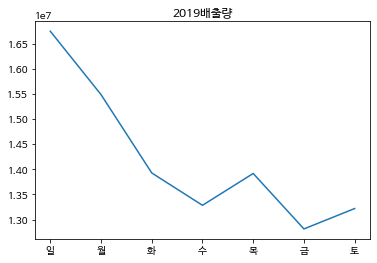

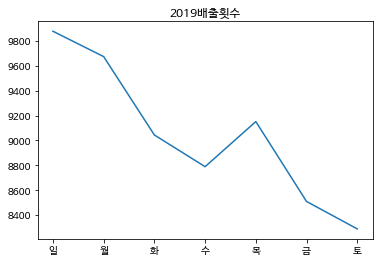

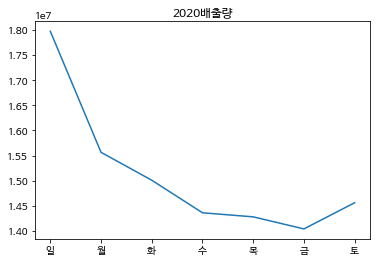

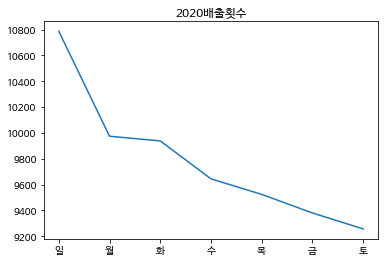

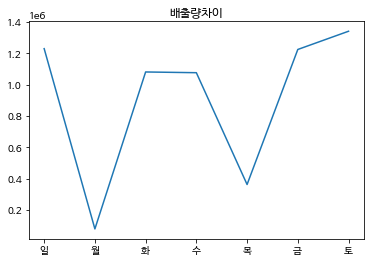

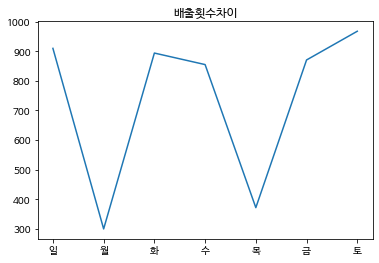

In [151]:
def dfgw_plot(col) :
  plt.plot(dfgw[col])
  plt.title(col)
  
  plt.xticks(range(1,8), labels=['일','월','화','수','목','금','토'])
  plt.show()

for i in dfgw.columns :
  dfgw_plot(i)

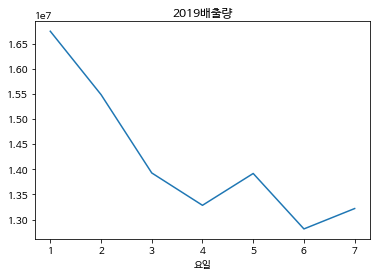

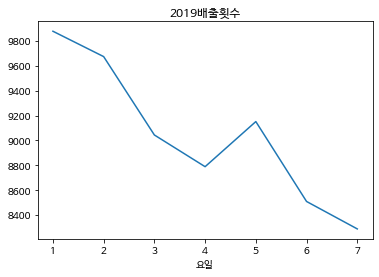

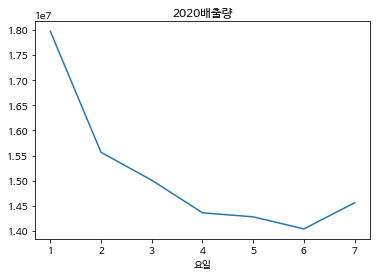

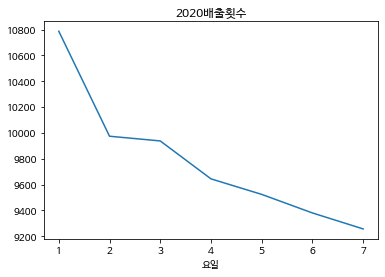

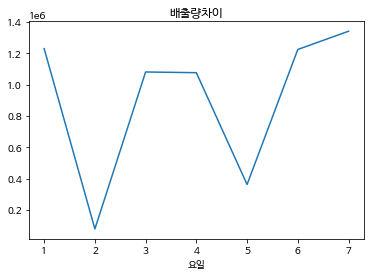

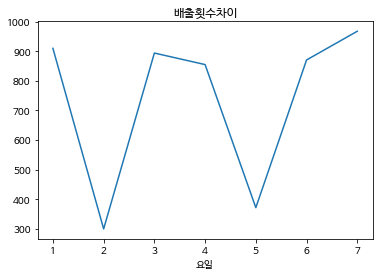

In [ ]:
#각 열의 그래프 그리기 